In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("KMall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0,0
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
495,496,Male,47,60,47
496,497,Male,27,60,50
497,498,Male,27,61,42
498,499,Female,48,137,49


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              500 non-null    int64 
 1   Gender                  500 non-null    object
 2   Age                     500 non-null    int64 
 3   Annual Income (k$)      500 non-null    int64 
 4   Spending Score (1-100)  500 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.7+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.104000,56.184000,49.892000
std,144.481833,14.311213,25.660926,25.260493
min,1.000000,18.000000,0.000000,0.000000
25%,125.750000,28.000000,38.000000,35.000000
50%,250.500000,36.000000,54.000000,50.000000
75%,375.250000,49.000000,73.250000,71.250000
max,500.000000,70.000000,137.000000,99.000000


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
495,496,Male,47,60,47
496,497,Male,27,60,50
497,498,Male,27,61,42
498,499,Female,48,137,49
499,500,Male,20,77,82


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.shape

(500, 5)

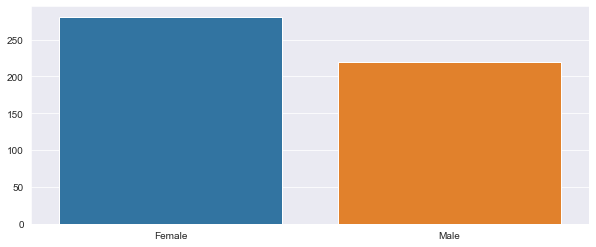

In [10]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [11]:
X = df.iloc[:,[3,4]].values
X


array([[  0,   0],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [13]:
from sklearn.model_selection import train_test_split
train_test_split(X,y,train_size=0.3,random_state=42)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,train_size=0.3,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(Xtrain, ytrain)

LinearRegression()

In [15]:
#Predicted grade scores from test dataset
y_predict = LinReg.predict(Xtest)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(max_depth = 4, random_state = 10)
model_1.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=4, random_state=10)

In [17]:
from sklearn.linear_model import LogisticRegression

model_2=LogisticRegression()
model_2.fit(Xtrain,ytrain)

C:\Users\Monika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#classification 1 accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
pred_1 = model_1.predict(Xtest)
accuracy_score(ytest, pred_1)
print("Accuracy of RandomForestClassifier model:",accuracy_score(ytest, pred_1))

Accuracy of RandomForestClassifier model: 0.98


In [19]:
#classification 1 accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
pred = model_2.predict(Xtest)
accuracy_score(ytest, pred)
print("Accuracy of LogisticRegression model:",accuracy_score(ytest, pred))

Accuracy of LogisticRegression model: 0.9942857142857143


In [21]:
# finding wcss value for different number of clusters
#within clusters sum of squares

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\Monika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


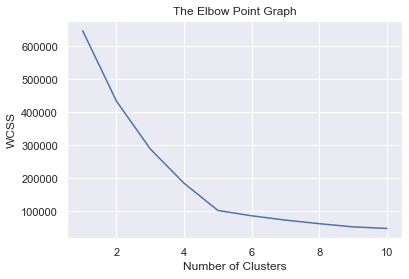

In [22]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:

model=KMeans(n_clusters=5, init='k-means++', random_state=42)
y=model.fit_predict(X)


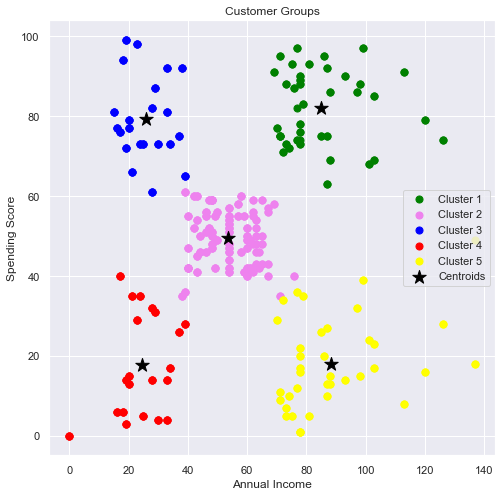

In [24]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='violet', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='yellow', label='Cluster 5')

# plot the centroids
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], s=200, c='black',marker='*',label='Centroids')
plt.title('Customer Groups')

plt.xlabel('Annual Income')

plt.ylabel('Spending Score')

plt.grid(2)
plt.legend()
plt.show()



In [25]:
import pickle
pickle.dump(model, open("model.pkl","wb"))